**DB Scan clustering (not from scratch) - Mall Customer Segmentation Data**

**Initial Data Exploration**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
# Load the dataset
file_path = 'Mall_Customers.csv'
mall_customers_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(mall_customers_data.head())

# Checking for missing values
print("\nMissing values in each column:")
missing_values = mall_customers_data.isnull().sum()
print(missing_values)

# Statistical summary of the dataset
print("\nStatistical summary of the dataset:")
statistical_summary = mall_customers_data.describe()
print(statistical_summary)

Saving Mall_Customers.csv to Mall_Customers.csv
First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Statistical summary of the dataset:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721  

**Further Data Exploration**

In [ ]:
# Checking for missing values
missing_values = mall_customers_data.isnull().sum()

# Statistical summary of the dataset
statistical_summary = mall_customers_data.describe()

missing_values, statistical_summary

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000               73.000000
 max    200.000000   70.000000          137.000000               99.000000)

**Distribution Analysis**

**Visual Exploration of Data**

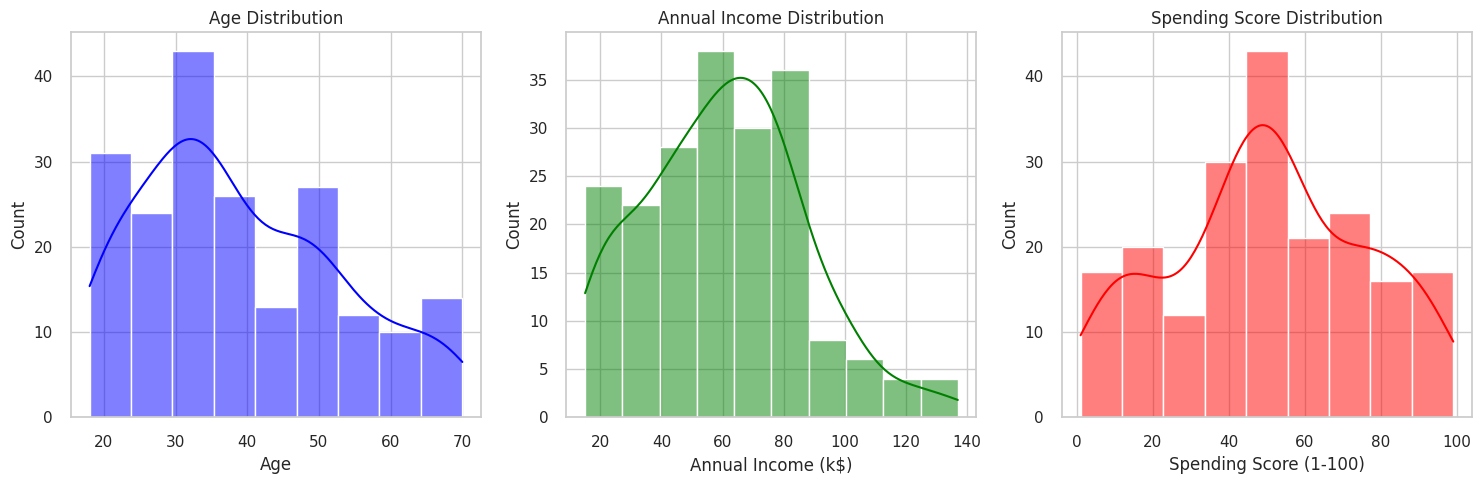

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting histograms for key variables
plt.figure(figsize=(15, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
sns.histplot(mall_customers_data['Age'], kde=True, color='blue')
plt.title('Age Distribution')

# Histogram for Annual Income
plt.subplot(1, 3, 2)
sns.histplot(mall_customers_data['Annual Income (k$)'], kde=True, color='green')
plt.title('Annual Income Distribution')

# Histogram for Spending Score
plt.subplot(1, 3, 3)
sns.histplot(mall_customers_data['Spending Score (1-100)'], kde=True, color='red')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

**Data Preparation for Clustering**

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting relevant features for clustering
features = mall_customers_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Displaying the first few rows of the standardized data
scaled_features[:5]


array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

**Applying DBSCAN clustering to our dataset**

In [ ]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN Clustering
# These parameters (eps and min_samples) can be tuned for different results
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Adding the cluster labels to the original data
mall_customers_data['Cluster'] = clusters

# Displaying the first few rows with cluster labels
mall_customers_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,0
2,3,Female,20,16,6,-1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,-1


**Cluster analysis and visualization**

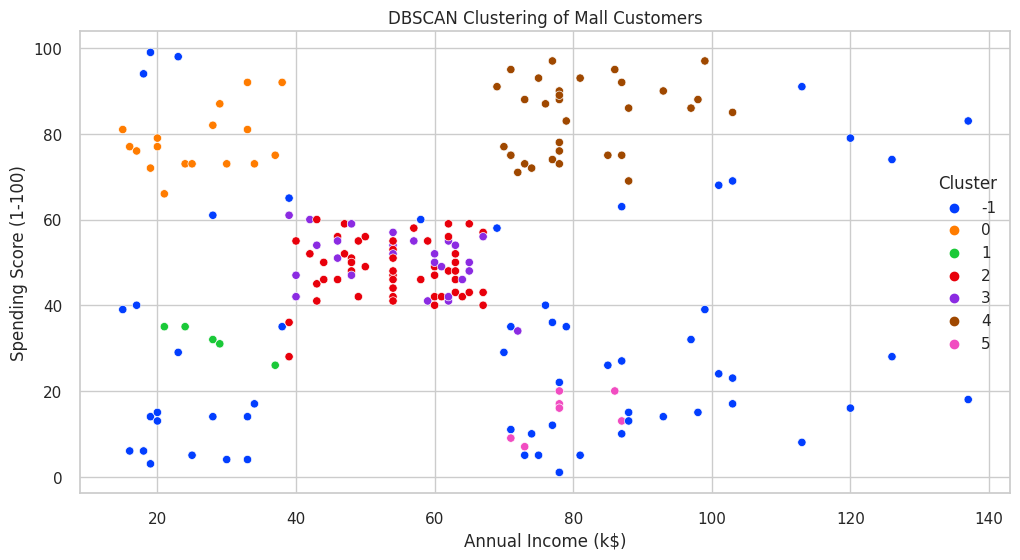

-1    60
 2    51
 4    32
 3    28
 0    17
 5     7
 1     5
Name: Cluster, dtype: int64

In [ ]:
# Analyzing Cluster Distribution
cluster_distribution = mall_customers_data['Cluster'].value_counts()

# Plotting the Clusters
plt.figure(figsize=(12, 6))

# We'll use 'Annual Income' and 'Spending Score' for a 2D plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='bright', data=mall_customers_data, legend='full')

plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

cluster_distribution


**Fine-Tuning**

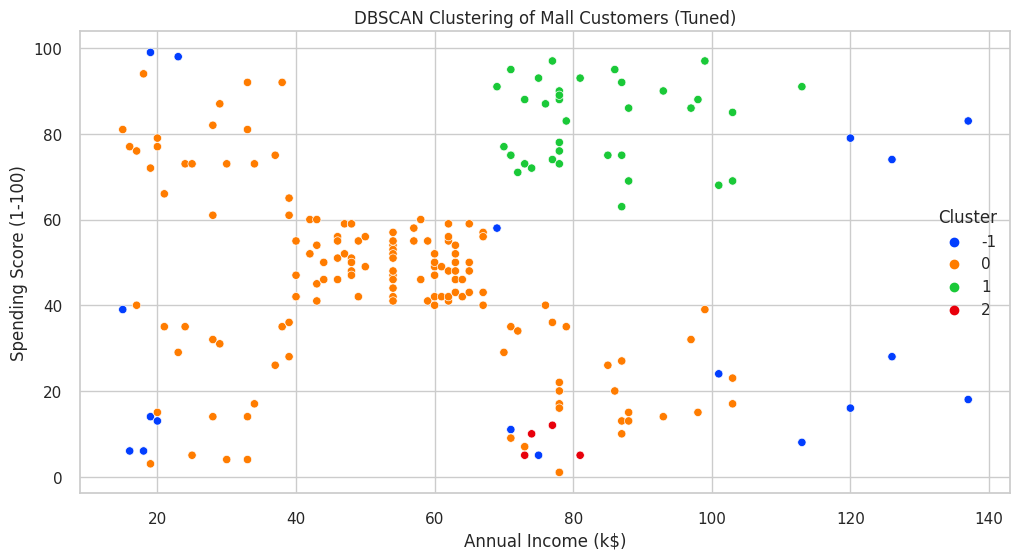

 0    142
 1     36
-1     18
 2      4
Name: Cluster_Tuned, dtype: int64

In [ ]:
# Fine-tuning the DBSCAN model
# Increasing eps value and adjusting min_samples
dbscan_tuned = DBSCAN(eps=0.6, min_samples=4)
clusters_tuned = dbscan_tuned.fit_predict(scaled_features)

# Adding the new cluster labels to the data
mall_customers_data['Cluster_Tuned'] = clusters_tuned

# Analyzing the new cluster distribution
cluster_distribution_tuned = mall_customers_data['Cluster_Tuned'].value_counts()

# Plotting the new clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_Tuned',
                palette='bright', data=mall_customers_data, legend='full')

plt.title('DBSCAN Clustering of Mall Customers (Tuned)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

cluster_distribution_tuned

**DB Scan Clustering using PyCaret**

In [ ]:
pip install pycaret

**Import PyCaret Clustering Module**

In [ ]:
from pycaret.clustering import *

**Setting Up the Environment**

In [ ]:
cluster_setup = setup(data = mall_customers_data.drop('CustomerID', axis=1), normalize = True, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(200, 6)"
2,Transformed data shape,"(200, 6)"
3,Ordinal features,1
4,Numeric features,5
5,Categorical features,1
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


**Creating a DBSCAN Model**

In [ ]:
dbscan_model = create_model('dbscan', eps=0.5, min_samples=5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0539,11.9891,1.3777,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
pip install --upgrade scipy pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 10.2 MB/s eta 0:00:00


**Assigning Clusters to the Data**

In [ ]:
results = assign_model(dbscan_model)

**Saving the Model**

In [ ]:
save_model(dbscan_model, 'dbscan_model_for_mall_customers')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Annual Income (k$)',
                                              'Spending Score (1-100)',
                                              'Cluster', 'Cluster_Tuned'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_t